# Run  dem_parameters

#### This notebook resamples the DEM to the model grid and stores cell DEM attributes in hru_params.shp.

In [7]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
import arcpy
import geopandas
import matplotlib.image as mpimg
import ConfigParser
from matplotlib import cm
from arcpy import env
python_exe = sys.executable

In [8]:
# Set folder locations
arc_gsflow_folder=r"..\scripts"
config_file_folder=r"..\examples\sagehen"

#### GsflowArcpy uses a configuration file to set variables required by the scripts. Below the configuration file template is read, and default values are changed and written to the configuration file (".INI") read by GsflowArcpy.

In [9]:
# Load GsflowArcpy configuration file
Config = ConfigParser.ConfigParser()
Config.read("..\examples\sagehen\sagehen_parameters_orig.ini")

['..\\examples\\sagehen\\sagehen_parameters_orig.ini']

In [10]:
# Set problem specific variable values for scripts
dem_orig_path = "..\examples\sagehen\dem\imgn40w121_13_filled.img"
dem_units = "meters"
dem_projection_method = "BILINEAR"
dem_cellsize = 10
calc_flow_acc_dem_flag = True
# flow_acc_dem_factor = 0.001
dem_adj_copy_field = "DEM_FLOWAC"
reset_dem_adj_flag = False

In [11]:
# Write out modified values to configuration file
cfgfile = open("..\examples\sagehen\sagehen_parameters.ini",'w')
Config.set('INPUTS','dem_orig_path',dem_orig_path)
Config.set('INPUTS','dem_units',dem_units)
Config.set('INPUTS','dem_projection_method',dem_projection_method)
Config.set('INPUTS','dem_cellsize',dem_cellsize)
Config.set('INPUTS','calc_flow_acc_dem_flag',calc_flow_acc_dem_flag)
#Config.set('INPUTS','flow_acc_dem_factor',flow_acc_dem_factor)
Config.set('INPUTS','dem_adj_copy_field',dem_adj_copy_field)
Config.set('INPUTS','reset_dem_adj_flag',reset_dem_adj_flag)
Config.write(cfgfile)
cfgfile.close()

In [12]:
# Set and run dem_parameters script
%run ../scripts/dem_parameters.py -i ../examples/sagehen/sagehen_parameters.ini


################################################################################
Run Time Stamp:      2019-09-06 12:39:32.617000
Current Directory:   D:\Workspace\classes\gsflowID2447_classrepo\exercises\saghen_prms\notebook
Script:              dem_parameters.py

GSFLOW DEM Parameters
  flow_acc_dem_factor was not set in the input file
  Using automatic flow_acc_dem_factor: 1.0
  Missing INI parameter, setting dem_adj_decimals = 2

Checking model points shapefile
  Checking model point types

Adding DEM fields if necessary

Projecting DEM raster

Calculating filled DEM raster
Calculating flow direction raster
Calculating flow accumulation raster
Calculating slope raster
  Setting slopes <= 0.01 to 0
Calculating aspect raster
Calculating temperature aspect adjustment raster

Calculating DEM zonal statistics
  DEM_ASPECT: MEAN
    ..\examples\sagehen\hru_params\dem_rasters\dem_aspect.img
  DEM_COUNT: SUM
    ..\examples\sagehen\hru_params\dem_rasters\flow_acc_filter.img
  DEM_MAX: MAXI

#### Run the GsflowArcpy script dem_parameters.

In [6]:
# Set and run dem_parameters script
if 0:
    script = r"dem_parameters.py"
    argument = r" -i ..\examples\sagehen\sagehen_parameters.ini"
    cmd=python_exe + " " + os.path.join(arc_gsflow_folder,script)
    cmd = cmd + argument
    os.system(cmd)

0

#### The dem_parameters script populates cell altitude statistics in hru_params.shp. The table below shows the first 10 rows. Note that some variables in the hru_params table have not been give a value yet.

In [13]:
fn1=r"..\examples\sagehen\hru_params\hru_params.shp"
table=geopandas.read_file(fn1)
table.head(10)

,ORIG_FID,HRU_ID,HRU_TYPE,DEM_MEAN,DEM_MIN,DEM_MAX,DEM_ADJ,DEM_FLOWAC,DEM_SUM,DEM_COUNT,...,PPT_RT_04,PPT_RT_05,PPT_RT_06,PPT_RT_07,PPT_RT_08,PPT_RT_09,PPT_RT_10,PPT_RT_11,PPT_RT_12,geometry
0,0,6385,0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000e+00,0.000000,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214109.9999999997 4366620, 214109.99..."
1,1,6386,0,2155.573934,2148.798096,2162.991943,2153.81,2153.812295,3.709343e+04,17.222222,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214199.9999999998 4366620.000000001,..."
2,2,6387,0,2154.183817,2148.162109,2162.430908,2155.12,2155.115054,5.653489e+07,26232.888984,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214289.9999999992 4366619.999999999,..."
3,3,6388,0,2156.385956,2146.514893,2169.937500,2156.32,2156.319658,3.623336e+06,1680.333338,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214380.0000000002 4366620, 214380 43..."
4,4,6389,0,2155.930990,2138.800049,2171.084473,2157.96,2157.961997,4.590705e+06,2127.333342,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214470.0000000004 4366620, 214470.00..."
5,5,6390,0,2152.734176,2134.806396,2172.362549,2151.68,2151.681130,1.676303e+07,7790.666620,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214560.0000000001 4366620, 214560.00..."
6,6,6391,0,2154.347614,2137.448242,2172.604248,2157.94,2157.943925,2.145716e+06,994.333342,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214649.999999999 4366620, 214650.000..."
7,7,6392,0,2139.265459,2116.842529,2157.882568,2140.56,2140.556653,9.911253e+06,4630.222237,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214739.9999999992 4366620, 214740.00..."
8,8,6393,0,2131.273872,2113.063477,2149.097412,2132.14,2132.140675,1.441730e+07,6761.888910,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214830.0000000008 4366619.999999999,..."
9,9,6394,0,2126.182726,2100.656494,2147.709961,2127.84,2127.844974,1.582880e+06,743.888886,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214919.9999999993 4366620, 214919.99..."


#### The model grid-scale DEM and boundary are shown bellow.

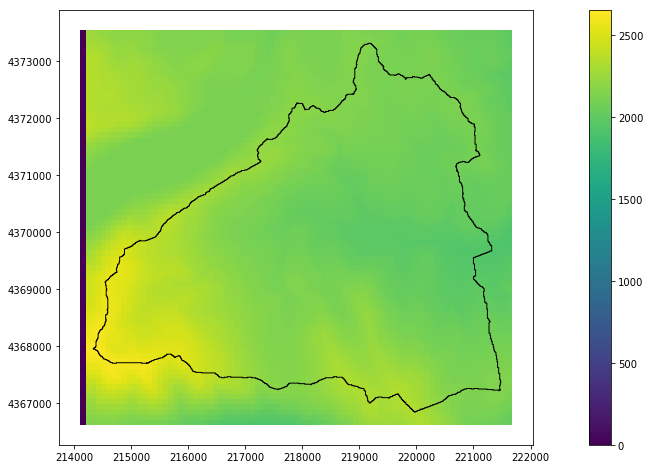

In [14]:
# Plot the resampled grid cell altutudes
fig, ax = plt.subplots(figsize=(20,8))
fn1=r"..\examples\sagehen\shapefiles\watershed_proj.shp"
fn2=r"..\examples\sagehen\hru_params\hru_params.shp"
boundary=geopandas.read_file(fn1)
hru_params=geopandas.read_file(fn2)
hru_params.plot(column="DEM_ADJ",ax=ax,legend=True)
boundary.plot(ax=ax,color='none', edgecolor='black', linewidth=1.0)
plt.show()